<a href="https://colab.research.google.com/github/Harshitj8126/Harshit-jindal-s-personal-website-/blob/main/Copy_of_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

✅ Loading the dataset

✅ Performing data cleaning (handling missing values, duplicates, and outliers)

✅ Performing univariate, bivariate, and multivariate analysis

✅ Data visualization

✅ Feature scaling (normalization and standardization)

📌 Project: Exploratory Data Analysis (EDA) on Titanic Dataset

🔹 Objective

Perform EDA on the Titanic dataset to extract insights about survival patterns based on factors like age, gender, ticket class, and embarkation port.

🔹 Dataset: Titanic Dataset

You can get the Titanic dataset from Kaggle.

# Step 1: Import Necessary Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
df = pd.read_csv("/content/tested.csv")

# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Step 2: Load the Dataset

In [4]:
! kaggle datasets download brendan45774/test-file
!unzip test-file.zip

Dataset URL: https://www.kaggle.com/datasets/brendan45774/test-file
License(s): CC0-1.0
  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 17.7MB/s]
Archive:  test-file.zip
  inflating: tested.csv              


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
# Load dataset
df = pd.read_csv("/content/tested.csv")

# Display first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Step 3: Basic Data Exploration



In [ ]:
# Check dataset shape
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Check column information
df.info()

# Summary statistics
df.describe()


Dataset has 891 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 4: Handling Missing Values



In [12]:
# Check missing values
print(df.isnull().sum())
# print(df.head(100))
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
# print(df)
# # Fill missing Embarked with most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# # Drop Cabin column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# # Verify missing values are handled
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


/tmp/ipython-input-1747903547.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1747903547.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [13]:
# Step 5: Handling Duplicates

# Check for duplicates
print(f"Duplicates in dataset: {df.duplicated().sum()}")

# Remove duplicates if any
df.drop_duplicates(inplace=True)


Duplicates in dataset: 0


In [14]:
# Step 6: Detecting and Removing Outliers

# Define function to detect outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

# Removing outliers from Age and Fare
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


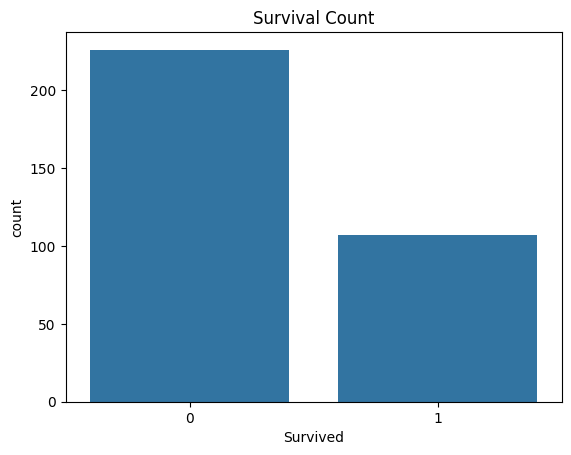

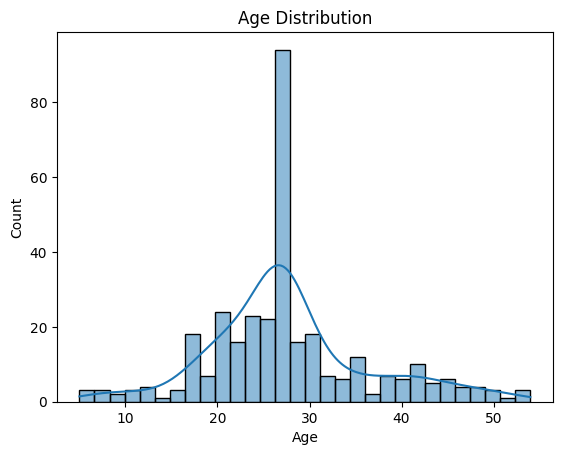

In [15]:
# Step 7: Univariate Analysis
# Countplot for Survived
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Histogram for Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


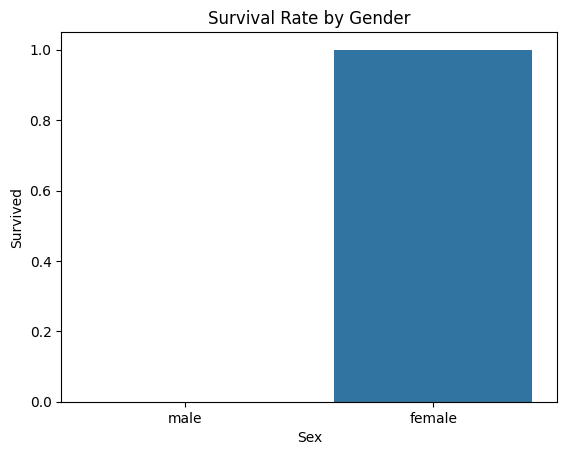

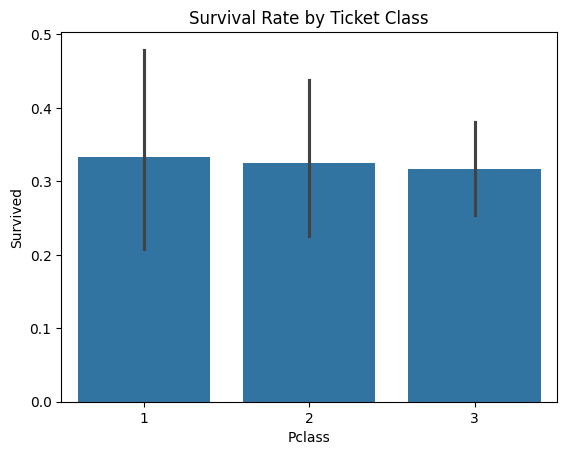

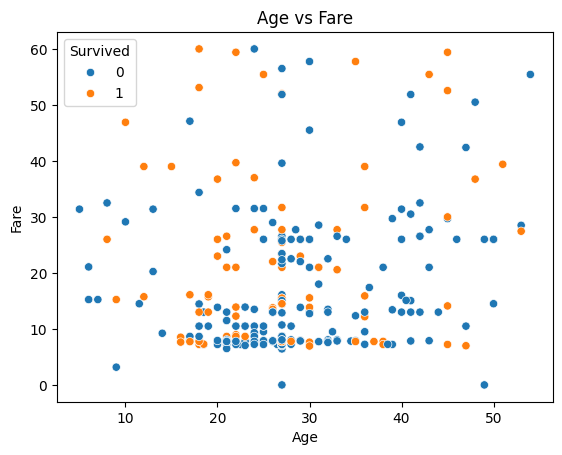

In [16]:
# Step 8: Bivariate Analysis
# Survival rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Ticket Class")
plt.show()

# Scatter plot between Age and Fare
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare")
plt.show()


In [17]:
# Step 9: Data Normalization & Standardization
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


In [18]:
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0.602041,0,0,330911,0.130487,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.857143,1,0,363272,0.116667,S
3,895,0,3,"Wirz, Mr. Albert",male,0.448980,0,0,315154,0.144375,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.346939,1,1,3101298,0.204792,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,0.183673,0,0,7538,0.153750,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,0.469388,0,0,347086,0.129583,S
413,1305,0,3,"Spector, Mr. Woolf",male,0.448980,0,0,A.5. 3236,0.134167,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,0.683673,0,0,SOTON/O.Q. 3101262,0.120833,S
416,1308,0,3,"Ware, Mr. Frederick",male,0.448980,0,0,359309,0.134167,S


In [19]:
standardizer = StandardScaler()
df[['Age', 'Fare']] = standardizer.fit_transform(df[['Age', 'Fare']])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0.776782,0,0,330911,-0.708134,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.202109,1,0,363272,-0.772889,S
3,895,0,3,"Wirz, Mr. Albert",male,-0.078414,0,0,315154,-0.643058,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.648545,1,1,3101298,-0.359968,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,-1.560754,0,0,7538,-0.599130,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,0.035612,0,0,347086,-0.712367,S
413,1305,0,3,"Spector, Mr. Woolf",male,-0.078414,0,0,A.5. 3236,-0.690891,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,1.232886,0,0,SOTON/O.Q. 3101262,-0.753366,S
416,1308,0,3,"Ware, Mr. Frederick",male,-0.078414,0,0,359309,-0.690891,S


In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0.776782,0,0,330911,-0.708134,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.202109,1,0,363272,-0.772889,S
3,895,0,3,"Wirz, Mr. Albert",male,-0.078414,0,0,315154,-0.643058,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.648545,1,1,3101298,-0.359968,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,-1.560754,0,0,7538,-0.599130,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,0.035612,0,0,347086,-0.712367,S
413,1305,0,3,"Spector, Mr. Woolf",male,-0.078414,0,0,A.5. 3236,-0.690891,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,1.232886,0,0,SOTON/O.Q. 3101262,-0.753366,S
416,1308,0,3,"Ware, Mr. Frederick",male,-0.078414,0,0,359309,-0.690891,S
